In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from utils import get_paper_details, _get_paper_citations, bulk_get_paper_details
import itertools

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True) # activate latex text rendering

import numpy as np
import pandas as pd

from tqdm import tqdm

In [3]:
# read data
df = pd.read_csv("../data/clean_data.csv", sep=",", index_col=0)
df.head()

,id,title,area,interpretability,doi,source,working_doi
0,187,Probabilistic FastText for Multi-Sense Word Em...,Word Semantics,NaN,10.18653/v1/P18-1001,ACL2018,True
1,1520,A La Carte Embedding: Cheap but Effective Indu...,Word Semantics,NaN,10.18653/v1/P18-1002,ACL2018,True
2,707,Unsupervised Learning of Distributional Relati...,Word Semantics,NaN,10.18653/v1/P18-1003,ACL2018,True
3,1553,Explicit Retrofitting of Distributional Word V...,Word Semantics,NaN,10.18653/v1/P18-1004,ACL2018,True
4,76,Unsupervised Neural Machine Translation with W...,Machine Translation,NaN,10.18653/v1/P18-1005,ACL2018,True


In [4]:
df["source"].value_counts()

source
ACL2023      1201
EMNLP2023    1047
EMNLP2021     839
EMNLP2022     829
ACL2020       816
EMNLP2020     810
ACL2021       742
ACL2022       739
EMNLP2019     736
EMNLP2018     463
ACL2018       401
ACL2019       401
Name: count, dtype: int64

In [5]:
# get list of areas
for area in np.unique(df["area"].values):
    print(area)

Area A (Information Extraction and Question Answering) [LONG]
Area A from Area F (Discourse, Dialog, Summarization, Generation, Multimodal NLP) [LONG]
Area B (Text Mining and Information Retrieval) [LONG]
Area C (Social Media, Computational Social Science, Sentiment,  Opinion) [LONG]
Area D (Morphology, Syntax, Chunking, Psycholinguistics) [LONG]
Area E (Semantics) [LONG]
Area F (Discourse, Dialog, Summarization, Generation, Multimodal NLP) [LONG]
Area G (Machine Translation and Multilinguality) [LONG]
Area H (Machine Learning) [LONG]
Area H or D
Argument Mining
Best Paper Session
Cognitive Modeling and Psycholinguistics
Commonsense Reasoning
Computational Social Science and Cultural Analytics
Computational Social Science and Social Media
Computational Social Science and Social Media; Language Generation
Computational Social Science and Social Media; NLP Applications
Computational Social Science and Social Media; Sentiment Analysis, Stylistic Analysis, and Argument Mining
Demos
Dialog 

In [6]:
# get list of interpretability areas
interpretability_areas = []
for area in np.unique(df["area"].values):
    if "interpretability" in area.lower():
        interpretability_areas.append(area)

interpretability_areas

['Interpretability and Analysis of Models for NLP',
 'Interpretability and Analysis of Models for NLP; Language Generation',
 'Interpretability and Analysis of Models for NLP; Summarization',
 'Interpretability, Interactivity and Analysis of Models for NLP',
 'Interpretability, Interactivity, and Analysis of Models for NLP']

In [7]:
# get list of grounding areas
grounding_areas = []
for area in np.unique(df["area"].values):
    if "grounding" in area.lower():
        grounding_areas.append(area)

grounding_areas

['Dialog and Interactive Systems, Machine Translation and Multilinuality, Phonology, Morphology, and Word Segmentation, Speech, Vision, Robotics, Multimodal and Grounding, Tagging, Chunking, Syntax and Parsing',
 'Dialog and Interactive Systems, Speech, Vision, Robotics, Multimodal and Grounding',
 'Ethic Concerns:Speech, Vision, Robotics, Multimodal Grounding',
 'Language Grounding to Vision, Robotics and Beyond',
 'Language Grounding to Vision, Robotics and Beyond; Question Answering',
 'Language Grounding to Vision, Robotics and Beyond; Speech and Multimodality',
 'Language Grounding to Vision, Robotics, and Beyond',
 'Language Groundings, Speech and Multimodality',
 'Speech, Vision, Robotics, Multimodal Grounding',
 'Speech, Vision, Robotics, Multimodal and Grounding',
 'Vision, Multimodal, Grounding, Speech']

In [8]:
# get list of translation areas
mt_areas = []
for area in np.unique(df["area"].values):
    if "translation" in area.lower():
        mt_areas.append(area)

mt_areas

['Area G (Machine Translation and Multilinguality) [LONG]',
 'Dialog and Interactive Systems, Machine Translation and Multilinuality, Phonology, Morphology, and Word Segmentation, Speech, Vision, Robotics, Multimodal and Grounding, Tagging, Chunking, Syntax and Parsing',
 'Discourse and Pragmatics; Machine Translation and Multilinguality',
 'Machine Translation',
 'Machine Translation and Mulitilinguality, Phonology, Morphology and Word Segmentation, Tagging, Chunking, Syntax and Parsing',
 'Machine Translation and Multilinguality',
 'Machine Translation and Multilinguality; Phonology, Morphology and Word Segmentation',
 'Machine Translation, Multilinguality',
 'Neural Machine Translation']

In [9]:
# get list of syntax areas
syntax_areas = []
for area in np.unique(df["area"].values):
    if "syntax" in area.lower():
        syntax_areas.append(area)

syntax_areas

['Area D (Morphology, Syntax, Chunking, Psycholinguistics) [LONG]',
 'Dialog and Interactive Systems, Machine Translation and Multilinuality, Phonology, Morphology, and Word Segmentation, Speech, Vision, Robotics, Multimodal and Grounding, Tagging, Chunking, Syntax and Parsing',
 'Machine Translation and Mulitilinguality, Phonology, Morphology and Word Segmentation, Tagging, Chunking, Syntax and Parsing',
 'Syntax, Parsing and their Applications',
 'Syntax, Parsing, and Linguistic Theories',
 'Syntax: Tagging, Chunking and Parsing',
 'Syntax: Tagging, Chunking, and Parsing',
 'Tagging, Chunking, Syntax and Parsing']

In [10]:
# filter areas

grounding_areas = [
    'Dialog and Interactive Systems, Speech, Vision, Robotics, Multimodal and Grounding', # not sure whether we should remove this as well
    'Language Grounding to Vision, Robotics and Beyond',
    'Language Grounding to Vision, Robotics, and Beyond',
    'Language Groundings, Speech and Multimodality',
    'Speech, Vision, Robotics, Multimodal Grounding',
    'Speech, Vision, Robotics, Multimodal and Grounding',
    'Vision, Multimodal, Grounding, Speech'
]

mt_areas = [
    'Area G (Machine Translation and Multilinguality) [LONG]',
    'Machine Translation',
    'Machine Translation and Multilinguality',
    'Machine Translation, Multilinguality',
    'Neural Machine Translation'
]

syntax_areas = [
    'Area D (Morphology, Syntax, Chunking, Psycholinguistics) [LONG]',
    'Syntax, Parsing and their Applications',
    'Syntax, Parsing, and Linguistic Theories',
    'Syntax: Tagging, Chunking and Parsing',
    'Syntax: Tagging, Chunking, and Parsing',
    'Tagging, Chunking, Syntax and Parsing'
]

In [11]:
# get citation counts for papers from a certain area
area_to_sub_areas = {
    "interpretability": interpretability_areas,
    "grounding": grounding_areas,
    "machine translation": mt_areas,
    "syntax": syntax_areas,
}

citation_counts = {area: [] for area in area_to_sub_areas.keys()}

for area, sub_areas in area_to_sub_areas.items():
    print(area)
    
    for sub_area in sub_areas: 
        tmp = df[df["area"] == sub_area]
        papers = bulk_get_paper_details(paper_ids=list(tmp["doi"].values))
        print(sub_area, len(tmp), len(papers))
        citation_counts[area].append([paper.citation_count for paper in papers])

interpretability
Interpretability and Analysis of Models for NLP 245 245
Interpretability and Analysis of Models for NLP; Language Generation 11 11
Interpretability and Analysis of Models for NLP; Summarization 10 10
Interpretability, Interactivity and Analysis of Models for NLP 45 45
Interpretability, Interactivity, and Analysis of Models for NLP 50 50
grounding
Dialog and Interactive Systems, Speech, Vision, Robotics, Multimodal and Grounding 47 47
Language Grounding to Vision, Robotics and Beyond 109 109
Language Grounding to Vision, Robotics, and Beyond 42 42
Language Groundings, Speech and Multimodality 45 45
Speech, Vision, Robotics, Multimodal Grounding 83 83
Speech, Vision, Robotics, Multimodal and Grounding 10 10
Vision, Multimodal, Grounding, Speech 18 18
machine translation
Area G (Machine Translation and Multilinguality) [LONG] 60 59
Machine Translation 258 258
Machine Translation and Multilinguality 290 290
Machine Translation, Multilinguality 16 16
Neural Machine Translat

In [12]:
# total number of citations
for area in area_to_sub_areas.keys():
    values = np.asarray(list(itertools.chain(*citation_counts[area])))
    print(area, np.sum(values), np.sum(values) / len(values))

interpretability 12357 34.229916897506925
grounding 15102 42.66101694915254
machine translation 29451 46.896496815286625
syntax 3684 24.89189189189189


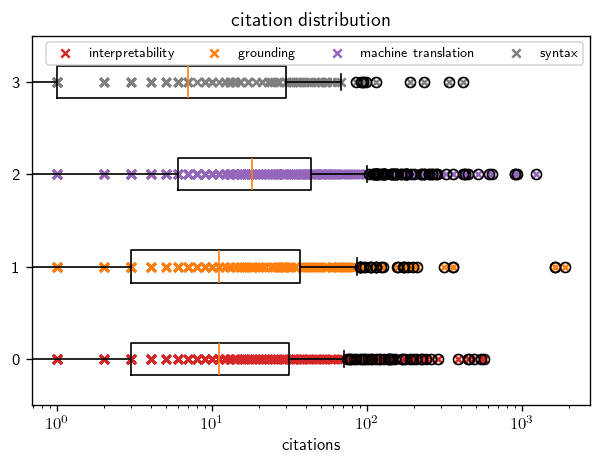

In [13]:
# plot results for each area separately 
colors = {
    "interpretability": "tab:red",
    "grounding": "tab:orange",
    "machine translation": "tab:purple",
    "syntax": "tab:grey",
}

fig, axes = plt.subplots(dpi=120, figsize=(6, 4)) # figsize=(width, height)

for idx, area in enumerate(area_to_sub_areas.keys()):
    values = np.asarray(list(itertools.chain(*citation_counts[area])))
    axes.boxplot(values, positions=[idx], widths=[0.35], vert=False)
    axes.scatter(values, [idx] * len(values), marker="x", color=colors[area], s=25, label=area)

axes.set_xscale("log")
axes.set_xlabel(r"citations")
axes.set_title("citation distribution")

# leg = axes.legend(loc="best", title=r"\textbf{area}:")
# leg._legend_box.align = "left"
leg = axes.legend(loc="best", ncols=4, fontsize=8)

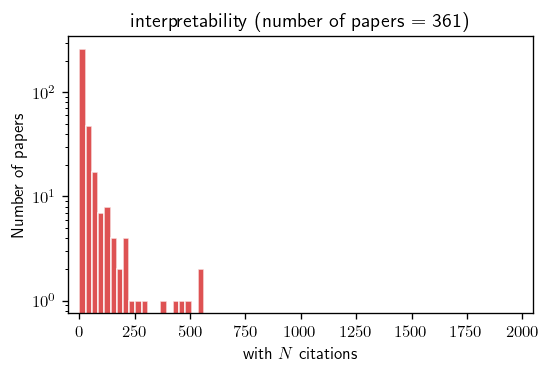

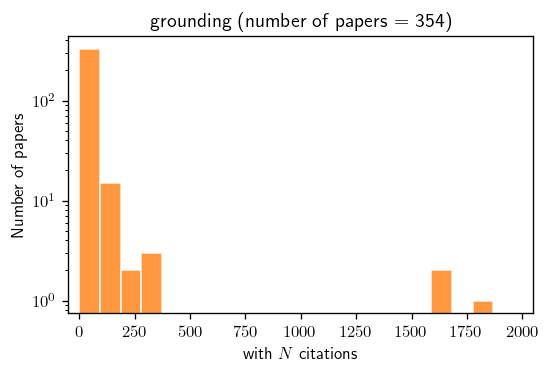

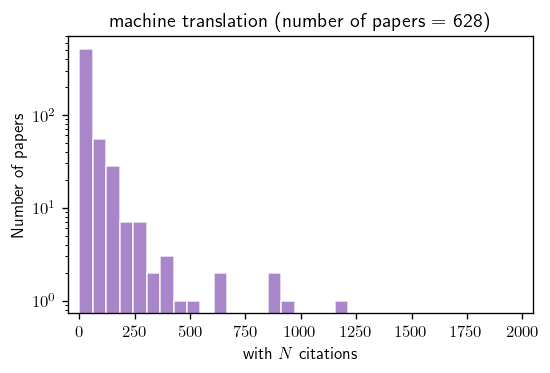

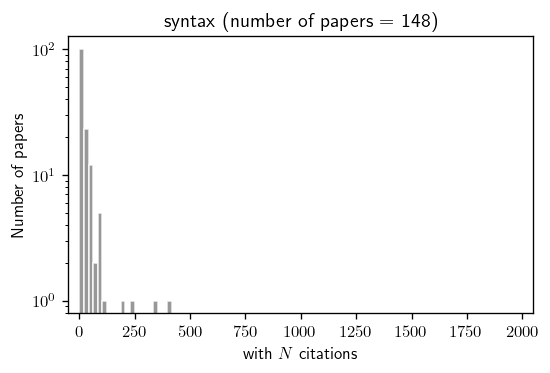

In [14]:
# plot results for each area separately 
colors = {
    "interpretability": "tab:red",
    "grounding": "tab:orange",
    "machine translation": "tab:purple",
    "syntax": "tab:grey",
}

for area in area_to_sub_areas.keys():
    fig, axes = plt.subplots(dpi=120, figsize=(5, 3)) # figsize=(width, height)

    values = np.asarray(list(itertools.chain(*citation_counts[area])))
    axes.hist(values, bins=20, alpha=0.8, edgecolor="white", linewidth=1.0, color=colors[area], label=area)

    axes.set_yscale("log")
    axes.set_ylabel("Number of papers")
    # axes.set_ylim(10^3)

    axes.set_xlabel(r"with $N$ citations")
    axes.set_xlim(-50, 2050)

    axes.set_title(rf"{area} (number of papers = {len(values)})")
    # leg = axes.legend(loc="best", title=r"\textbf{area}:")
    # leg._legend_box.align = "left"

## Compute impact factor (IF)

In [15]:
area_to_sub_areas

{'interpretability': ['Interpretability and Analysis of Models for NLP',
  'Interpretability and Analysis of Models for NLP; Language Generation',
  'Interpretability and Analysis of Models for NLP; Summarization',
  'Interpretability, Interactivity and Analysis of Models for NLP',
  'Interpretability, Interactivity, and Analysis of Models for NLP'],
 'grounding': ['Dialog and Interactive Systems, Speech, Vision, Robotics, Multimodal and Grounding',
  'Language Grounding to Vision, Robotics and Beyond',
  'Language Grounding to Vision, Robotics, and Beyond',
  'Language Groundings, Speech and Multimodality',
  'Speech, Vision, Robotics, Multimodal Grounding',
  'Speech, Vision, Robotics, Multimodal and Grounding',
  'Vision, Multimodal, Grounding, Speech'],
 'machine translation': ['Area G (Machine Translation and Multilinguality) [LONG]',
  'Machine Translation',
  'Machine Translation and Multilinguality',
  'Machine Translation, Multilinguality',
  'Neural Machine Translation'],
 's

In [16]:
papers_per_area = {}

for area, sub_areas in area_to_sub_areas.items():
    papers_per_area[area] = []
    
    for sub_area in sub_areas: 
        tmp = df[df["area"] == sub_area]
        papers = bulk_get_paper_details(paper_ids=list(tmp["doi"].values))
        print(sub_area, len(tmp), len(papers))
        papers_per_area[area] += papers

Interpretability and Analysis of Models for NLP 245 245
Interpretability and Analysis of Models for NLP; Language Generation 11 11
Interpretability and Analysis of Models for NLP; Summarization 10 10
Interpretability, Interactivity and Analysis of Models for NLP 45 45
Interpretability, Interactivity, and Analysis of Models for NLP 50 50
Status code: 429. Trying again ... (1)
Status code: 429. Trying again ... (2)
Status code: 429. Trying again ... (3)
Dialog and Interactive Systems, Speech, Vision, Robotics, Multimodal and Grounding 47 47
Language Grounding to Vision, Robotics and Beyond 109 109
Language Grounding to Vision, Robotics, and Beyond 42 42
Status code: 429. Trying again ... (1)
Status code: 429. Trying again ... (2)
Status code: 429. Trying again ... (3)
Status code: 429. Trying again ... (4)
Language Groundings, Speech and Multimodality 45 45
Speech, Vision, Robotics, Multimodal Grounding 83 83
Speech, Vision, Robotics, Multimodal and Grounding 10 10
Status code: 429. Tryi

In [17]:
for area, papers in papers_per_area.items():
    print(area, len(papers))

interpretability 361
grounding 354
machine translation 628
syntax 148


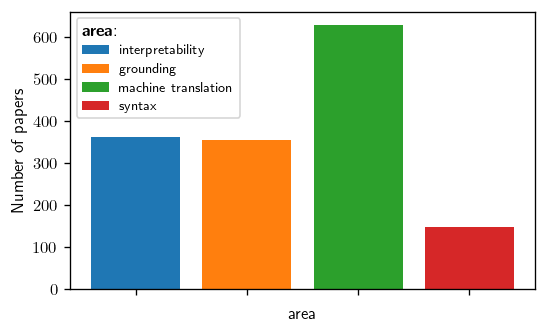

In [31]:
# for area, papers in papers_per_area.items():

fig, axes = plt.subplots(dpi=120, figsize=(5, 3)) # figsize=(width, height)

# bars = [len(papers) for papers in papers_per_area.values()]
# axes.bar(np.arange(len(bars)), bars)

for idx, (area, papers) in enumerate(papers_per_area.items()):
    axes.bar(idx, len(papers), label=area)

# format plot
axes.set_xlabel("area")
axes.set_xticks(range(len(papers_per_area.keys())))
axes.set_xticklabels([])
# axes.set_xticklabels(papers_per_area.keys())

axes.set_ylabel(r"Number of papers")
# axes.set_yscale("log")

leg = axes.legend(loc="best", title=r"\textbf{area}:", fontsize=8)
leg._legend_box.align = "left"

In [43]:
# papers per year based on Semantic Scholar
papers_per_year = {}
for area, papers in papers_per_area.items():
    papers_per_year[area] = {}
    for paper in papers:
        year = paper.year
        if year is not None:
            if year in papers_per_year[area]:
                papers_per_year[area][year] += 1
            else:
                papers_per_year[area][year] = 1

In [42]:
# fig, axes = plt.subplots(dpi=120, figsize=(5, 3)) # figsize=(width, height)

# years = [2018, 2019, 2020, 2021, 2022, 2023]
# ingore = [2016, 2017, 2024]

# for area, num_papers in papers_per_year_df.items():

#     # remove unwanted years
#     for year in ingore:
#         num_papers.pop(year, None)

#     # fill missing years
#     for year in years:
#         if year not in num_papers:
#             num_papers[year] = 0

#     values = dict(sorted(num_papers.items()))    
#     axes.plot(values.values(), linewidth=2.0, marker="o", alpha=0.8, label=area)

# # format plot
# axes.set_xlabel("year")
# axes.set_xticks(range(len(years)))
# axes.set_xticklabels(years)

# axes.set_ylabel(r"Number of papers per year")
# # axes.set_yscale("log")

# leg = axes.legend(loc="best", title=r"\textbf{area}:")
# leg._legend_box.align = "left"

In [45]:
# papers per year based on data frame
papers_per_year_df = {}

for area, sub_areas in area_to_sub_areas.items():
    papers_per_year_df[area] = {}
    for sub_area in sub_areas: 
        tmp = df[df["area"] == sub_area]
        venue_counts = tmp["source"].value_counts()
        for venue, row in venue_counts.items():
            year = int(venue[-4:])
            if year in papers_per_year_df[area]:
                papers_per_year_df[area][year] += row
            else:
                papers_per_year_df[area][year] = row

In [48]:
# fig, axes = plt.subplots(dpi=120, figsize=(5, 3)) # figsize=(width, height)

# years = [2018, 2019, 2020, 2021, 2022, 2023]
# ingore = [2016, 2017, 2024]

# for area, num_papers in papers_per_year_df.items():

#     # remove unwanted years
#     for year in ingore:
#         num_papers.pop(year, None)

#     # fill missing years
#     for year in years:
#         if year not in num_papers:
#             num_papers[year] = 0

#     values = dict(sorted(num_papers.items()))    
#     axes.plot(values.values(), linewidth=2.0, marker="o", alpha=0.8, label=area)

# # format plot
# axes.set_xlabel("year")
# axes.set_xticks(range(len(years)))
# axes.set_xticklabels(years)

# axes.set_ylabel(r"Number of papers per year")
# # axes.set_yscale("log")

# leg = axes.legend(loc="best", title=r"\textbf{area}:")
# leg._legend_box.align = "left"

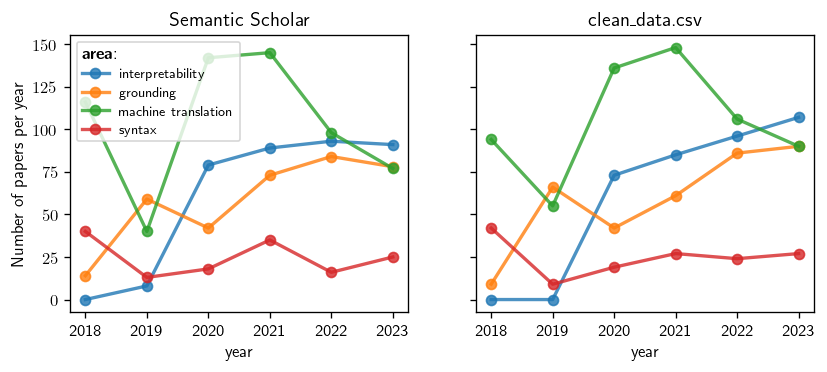

In [53]:
# plot number of papers based on Semantic Scholar and data frame together

fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(8, 3), sharey=True) # figsize=(width, height)

years = [2018, 2019, 2020, 2021, 2022, 2023]
ingore = [2016, 2017, 2024]

# based on Semantic Scholar
for area, num_papers in papers_per_year.items():

    # remove unwanted years
    for year in ingore:
        num_papers.pop(year, None)

    # fill missing years
    for year in years:
        if year not in num_papers:
            num_papers[year] = 0

    values = dict(sorted(num_papers.items()))    
    axes[0].plot(values.values(), linewidth=2.0, marker="o", alpha=0.8, label=area)
    axes[0].set_title("Semantic Scholar")

# based on data frame
for area, num_papers in papers_per_year_df.items():

    # remove unwanted years
    for year in ingore:
        num_papers.pop(year, None)

    # fill missing years
    for year in years:
        if year not in num_papers:
            num_papers[year] = 0

    values = dict(sorted(num_papers.items()))    
    axes[1].plot(values.values(), linewidth=2.0, marker="o", alpha=0.8, label=area)
    axes[1].set_title("clean_data.csv")

# format plot
for i in range(2):
    axes[i].set_xlabel("year")
    axes[i].set_xlabel("year")
    axes[i].set_xticks(range(len(years)))
    axes[i].set_xticklabels(years)

axes[0].set_ylabel(r"Number of papers per year")
# axes.set_yscale("log")

leg = axes[0].legend(loc="best", title=r"\textbf{area}:", fontsize=8)
leg._legend_box.align = "left"

In [55]:
# get citation graph for every paper
for area, papers in papers_per_area.items():
    # print(area, len(papers))
    for paper in tqdm(papers, desc=f"retrieving citations for {area} papers"):
        paper.retrieve_citations_fixed(limit=1000)

retrieving syntax papers: 100%|██████████| 148/148 [01:18<00:00,  1.89it/s]


In [58]:
# compute citations per year
citations_per_year = {}
for area, papers in papers_per_area.items():
    citations_per_year[area] = {} 
    for paper in tqdm(papers, desc=f"collecting citations counts for {area} papers"):
        for citing_paper in paper.citations:
            year = citing_paper.year
            if year is not None:
                if year in citations_per_year[area]:
                    citations_per_year[area][year] += 1
                else:
                    citations_per_year[area][year] = 1

collecting citations counts for interpretability papers: 100%|██████████| 361/361 [00:00<00:00, 86074.91it/s]
collecting citations counts for grounding papers: 100%|██████████| 354/354 [00:00<00:00, 108094.32it/s]
collecting citations counts for machine translation papers: 100%|██████████| 628/628 [00:00<00:00, 104928.61it/s]
collecting citations counts for syntax papers: 100%|██████████| 148/148 [00:00<00:00, 211717.94it/s]


In [59]:
citations_per_year

{'interpretability': {2023: 5065,
  2022: 3762,
  2021: 2445,
  2020: 771,
  2024: 215,
  2019: 34,
  2018: 3,
  2017: 1},
 'grounding': {2023: 5611,
  2022: 4094,
  2021: 1679,
  2020: 980,
  2024: 188,
  2019: 314,
  2018: 84},
 'machine translation': {2023: 7580,
  2022: 7493,
  2021: 5922,
  2020: 4350,
  2019: 2770,
  2018: 611,
  2017: 51,
  2024: 313,
  2016: 2},
 'syntax': {2023: 892,
  2022: 887,
  2021: 789,
  2020: 680,
  2019: 340,
  2018: 52,
  2017: 3,
  2016: 1,
  2024: 25}}

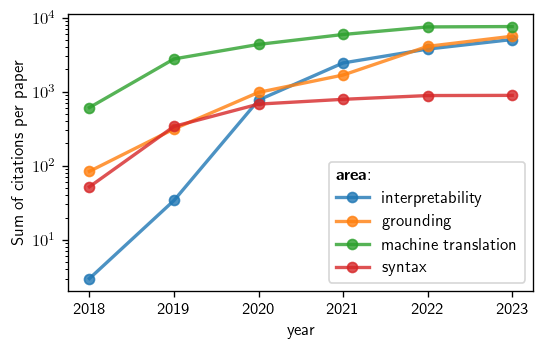

In [64]:
# plot citations per year
fig, axes = plt.subplots(dpi=120, figsize=(5, 3)) # figsize=(width, height)

years = [2018, 2019, 2020, 2021, 2022, 2023]
ingore = [2016, 2017, 2024]

for area, num_citations in citations_per_year.items():

    # remove unwanted years
    for year in ingore:
        num_citations.pop(year, None)

    # fill missing years
    for year in years:
        if year not in num_citations:
            num_citations[year] = 0

    values = dict(sorted(num_citations.items()))    
    axes.plot(values.values(), linewidth=2.0, marker="o", alpha=0.8, label=area)

# format plot
axes.set_xlabel("year")
axes.set_xticks(range(len(years)))
axes.set_xticklabels(years)

axes.set_ylabel(r"Sum of citations per paper")
axes.set_yscale("log")

leg = axes.legend(loc="best", title=r"\textbf{area}:")
leg._legend_box.align = "left"